In [1]:

# imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#set tickers and dates
tickers_list = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'XRP-USD', 'SOL-USD', 'DOT-USD', 'LTC-USD', 'LINK-USD', 'BCH-USD']
start_date = '2024-1-1'
end_date = '2024-5-7'


# Fetch the data
data = yf.download(tickers_list, start_date , end_date)['Adj Close']


# Print to check
print(data.tail(10))



[                       0%%                      ]

[**********            20%%                      ]  2 of 10 completed

[**************        30%%                      ]  3 of 10 completed

[*******************   40%%                      ]  4 of 10 completed

[**********************50%%                      ]  5 of 10 completed

[**********************60%%***                   ]  6 of 10 completed

[**********************70%%********              ]  7 of 10 completed

[**********************80%%************          ]  8 of 10 completed

[**********************90%%*****************     ]  9 of 10 completed

[*********************100%%**********************]  10 of 10 completed

Ticker       ADA-USD     BCH-USD     BNB-USD       BTC-USD   DOT-USD  \
Date                                                                   
2024-04-27  0.467032  477.419830  595.720520  63419.140625  6.798635   
2024-04-28  0.460474  470.621277  600.071167  63113.230469  6.723606   
2024-04-29  0.457365  465.610016  592.831238  63841.121094  6.591733   
2024-04-30  0.440812  434.157166  578.488037  60636.855469  6.422238   
2024-05-01  0.449866  424.038635  561.408203  58254.011719  6.883043   
2024-05-02  0.458282  429.969849  560.526733  59123.433594  7.285116   
2024-05-03  0.467544  453.345551  587.010437  62889.835938  7.255101   
2024-05-04  0.463577  463.508820  585.846558  63891.472656  7.127060   
2024-05-05  0.458334  469.264282  592.140381  64031.132812  7.306784   
2024-05-06  0.454288  473.358856  588.475952  63161.949219  7.122262   

Ticker          ETH-USD   LINK-USD    LTC-USD     SOL-USD   XRP-USD  
Date                                                             

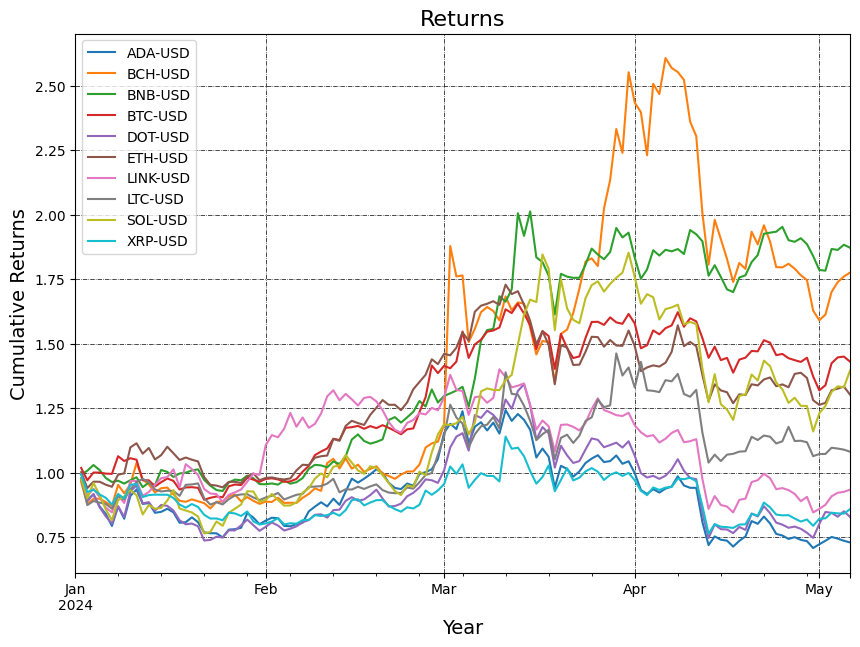

In [2]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [3]:
# show nulls
## shows when coin was created
### do not drop nulls since then data will only go back to when most recent crypto hit the market
data.isnull().sum()

Ticker
ADA-USD     0
BCH-USD     0
BNB-USD     0
BTC-USD     0
DOT-USD     0
ETH-USD     0
LINK-USD    0
LTC-USD     0
SOL-USD     0
XRP-USD     0
dtype: int64

In [4]:
# Save the raw data to the raw_data folder
raw_data_path = '../data/raw_data/crypto_data.csv'
data.to_csv(raw_data_path)
print(f"Raw data saved to {raw_data_path}")


Raw data saved to ../data/raw_data/crypto_data.csv


In [5]:
# Cleaning the data (example: fill nulls, remove unnecessary columns)
cleaned_data = data.fillna(method='ffill').dropna()  # Forward fill to handle the nulls
print("Data cleaned. Null values after cleaning:", cleaned_data.isnull().sum().sum())


Data cleaned. Null values after cleaning: 0


C:\Users\16023\AppData\Local\Temp\ipykernel_29816\1419373036.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = data.fillna(method='ffill').dropna()  # Forward fill to handle the nulls


In [6]:
import os
import plotly.express as px
import pandas as pd

# Calculate cumulative returns
cumulative_returns = (cleaned_data.pct_change()+1).cumprod()

# Check if the external_data directory exists, if not, create it
external_data_dir = '../external_data'
if not os.path.exists(external_data_dir):
    os.makedirs(external_data_dir)

# Path for the visualization
visual_path = os.path.join(external_data_dir, 'crypto_visuals.html')

# Create a cumulative returns plot using Plotly
cumulative_returns_fig = px.line(cumulative_returns, title="Cumulative Returns of Cryptocurrencies")
# Save the interactive chart as an HTML file
cumulative_returns_fig.write_html(visual_path)
print(f"Interactive chart saved to {visual_path}")

# Optionally save the cumulative returns data as a CSV file in the cleaned_data directory
cleaned_data_dir = '../data/cleaned_data'
if not os.path.exists(cleaned_data_dir):
    os.makedirs(cleaned_data_dir)
cleaned_data_file_path = os.path.join(cleaned_data_dir, 'cumulative_returns_crypto.csv')
cumulative_returns.to_csv(cleaned_data_file_path)
print(f"Cumulative returns data saved to {cleaned_data_file_path}")


Interactive chart saved to ../external_data\crypto_visuals.html
Cumulative returns data saved to ../data/cleaned_data\cumulative_returns_crypto.csv


In [7]:
# Save the cleaned data
cleaned_data_path = '../data/cleaned_data/cleaned_crypto_data.csv'
cleaned_data.to_csv(cleaned_data_path)
print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to ../data/cleaned_data/cleaned_crypto_data.csv
